In [421]:
# Initialize Otter
import otter
grader = otter.Notebook("exploring.ipynb")

# Instructions

This assignment lets you both define a strategy for picking the next point to explore and determine how you want to chop up a full path into way points. You'll need **path_planning.py** and **exploring.py** as well (for calculating the paths)

Note that there isn't a "right" answer for either of these. This is (mostly) a light-weight way to check your code for obvious problems before trying it in ROS. It's set up to make it easy to download a map and try some robot starting/ending points

Given to you:
- Image handling
- plotting
- Some structure for keeping/changing waypoints and converting to/from the map to the robot's coordinate space

Slides: https://docs.google.com/presentation/d/1tOUGoNDbzQeuzRwG-kJ-ipqDsCy3ABkIvNEdFmozRT8/edit?usp=sharing


In [422]:
# The ever-present numpy and matplot lib
import numpy as np

# Our priority queue
import heapq

# Using imageio to read in the image
import imageio

# Reading in map meta data
import yaml

In [423]:
import sys; 
sys.path.insert(0, '.')

# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<!-- BEGIN QUESTION -->

# Run exploring a SLAM map



In [424]:
from path_planning import convert_image, dijkstra, open_image, plot_with_path
from exploring import find_all_possible_goals, find_best_point, plot_with_explore_points, find_waypoints

(2140, 1863)


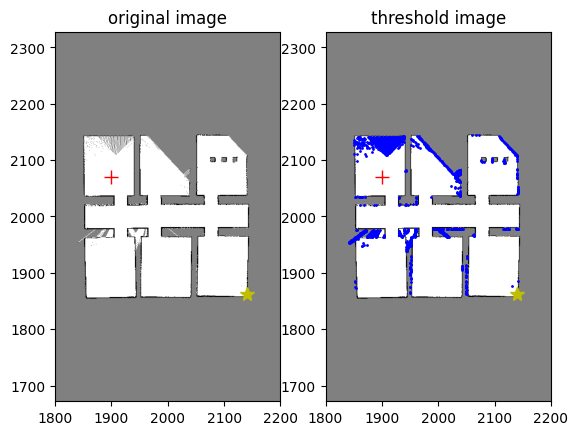

In [426]:
# You can use map or initial
im, im_thresh = open_image("map.pgm")

# Split into two pieces - find all of the points that are adjacent to an unknown area and a visible area
#    Then pick the best one
all_unseen = find_all_possible_goals(im_thresh)

robot_start_loc = (1900, 2070)
best_unseen = find_best_point(im_thresh, all_unseen, robot_loc=robot_start_loc)

print(best_unseen)

# Note: This can be a little slow (it's drawing a lot of little points)
plot_with_explore_points(im_thresh, zoom=0.1, robot_loc=robot_start_loc, explore_points=all_unseen, best_pt=best_unseen)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Run waypoint generation on a pretend SLAM map
Note: This code assumes you have the previous problem completed

Curvature at 1 is 0.9999999999999999
Curvature at 2 is 0.5547001962252291
Curvature at 3 is 0.8320502943378437
Curvature at 4 is 0.9999999999999999
Curvature at 5 is 0.9999999999999999
Curvature at 6 is 0.9999999999999999
Curvature at 7 is 0.9999999999999999
Curvature at 8 is 0.9999999999999999
Curvature at 9 is 0.9999999999999999
Curvature at 10 is 0.9999999999999999
Curvature at 11 is 0.9999999999999999
Curvature at 12 is 0.9999999999999999
Curvature at 13 is 0.9999999999999999
Curvature at 14 is 0.9999999999999999
Curvature at 15 is 0.9999999999999999
Curvature at 16 is 0.9999999999999999
Curvature at 17 is 0.9999999999999999
Curvature at 18 is 0.9999999999999999
Curvature at 19 is 0.9999999999999999
Curvature at 20 is 0.11043152607484653
Curvature at 21 is 0.9938837346736188
Curvature at 22 is 0.9191450300180578
Curvature at 23 is 0.9284766908852593
Curvature at 24 is 1.0
Curvature at 25 is 1.0
Curvature at 26 is 1.0
Curvature at 27 is 1.0
Curvature at 28 is 1.0
Curvature at 29 is 

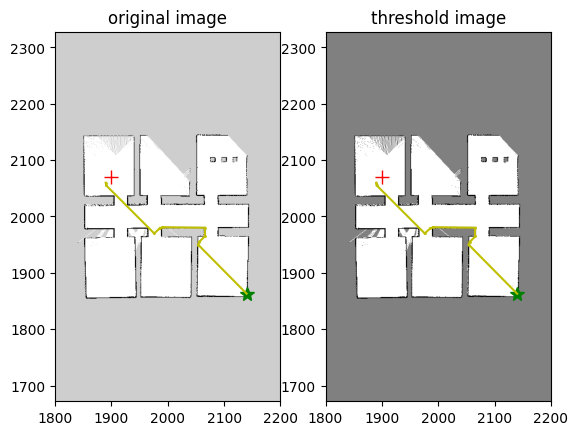

In [427]:
path = dijkstra(im_thresh, robot_start_loc, best_unseen)
waypoints = find_waypoints(im_thresh, path)
plot_with_path(im, im_thresh, zoom=0.1, robot_loc=robot_start_loc, goal_loc=best_unseen, path=waypoints)
print(f"Waypoints has {len(waypoints)} points of {len(path)}")

<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"not filled out"}
# List of URLS TAF24 (creates a set)
websites = {"not filled out"}
# Approximate number of hours, including lab/in-class time
hours = -1.5

In [ ]:
grader.check("hours_collaborators")

### To submit

- Do a restart then run all to make sure everything runs ok
- Save the file
- Submit this .ipynb file and **path_planning.py** and **exploring.py** through gradescope, Lab 4: Explore
- You do NOT need to submit the data files - we will supply those
- Take out/suppress all print statements

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Most likely failure for this assignment is not naming the data directory and files correctly; capitalization matters for the Gradescope grader. 

Second most likely failure is because your code ran very, very slowly and the autograder timed out.

Third reason for failure is you forgot to include **path_planning.py** and **exploring.py** and/or you put the file(s) in a folder